# Topic Modelling using Tensorflow Hub and K-means clustering

In [ ]:
%load_ext autoreload
%autoreload 2

## Data

In [ ]:
from dataset import load_news_dataset

In [ ]:
data_path = 'data/'

In [ ]:
df = load_news_dataset(data_path)

In [ ]:
df.shape

(142570, 9)

In [ ]:
df.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic', 'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post',
       'Fox News', 'Talking Points Memo', 'Buzzfeed News',
       'National Review', 'New York Post'], dtype=object)

In [ ]:
articles = df[df.publication == 'New York Times']

In [ ]:
articles.shape

(7803, 9)

## Clustering

In [ ]:
from clustering import cluster_embeddings

In [ ]:
num_clusters = 6

In [ ]:
labels = cluster_embeddings(articles.content.values, num_clusters)

In [ ]:
clustered_articles = articles.copy()
clustered_articles['label'] = labels

## Cluster Word Clouds

In [ ]:
from text import create_wordcloud
import matplotlib.pyplot as plt
from math import ceil

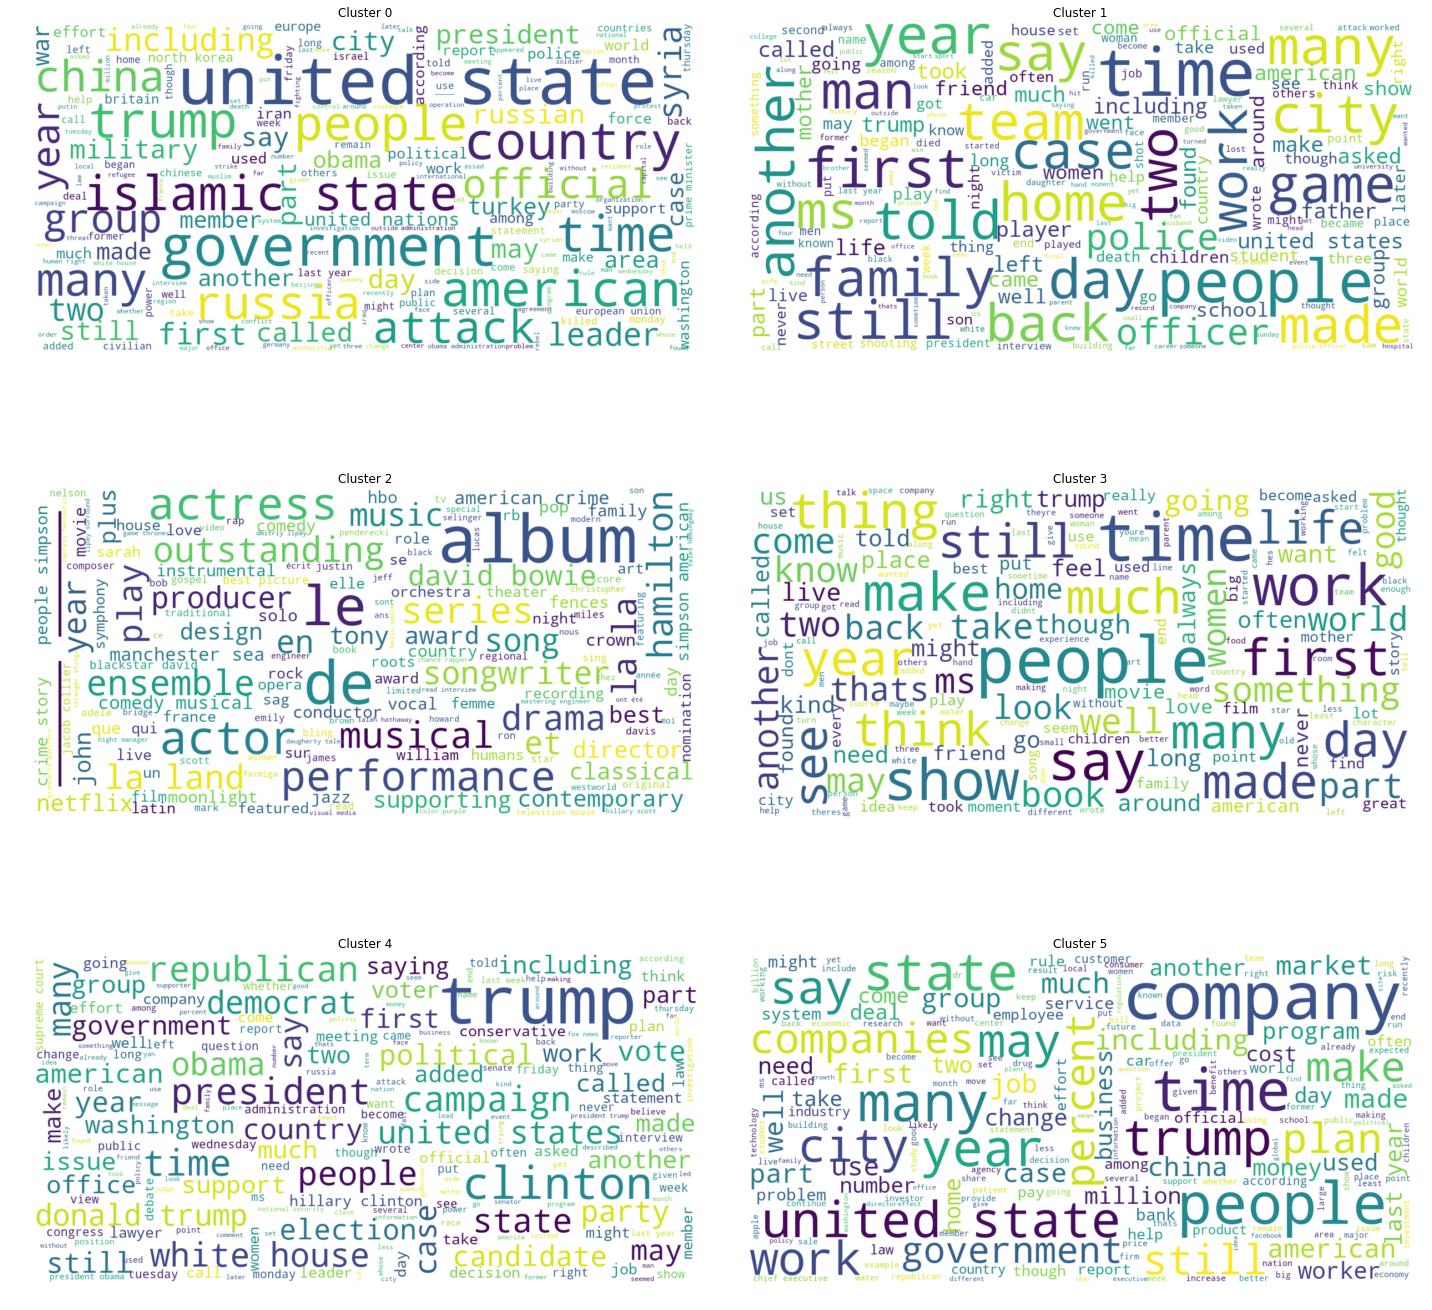

In [ ]:
n_cols = 2
n_rows = ceil(num_clusters/n_cols)
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20,20))

for i in range(num_clusters):
    cluster_text = clustered_articles[clustered_articles.label == i].content.values
    if len(cluster_text) > 0:
        word_cloud = create_wordcloud(cluster_text)

        axis = axes.ravel()[i]
        axis.imshow(word_cloud, interpolation='bilinear')
        axis.set_title(f'Cluster {i}')
        axis.set_axis_off()


plt.tight_layout()
plt.show()